<a href="https://colab.research.google.com/github/nosgueira/PLN-2022-1/blob/main/Atividade05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento Da Rede

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [3]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [4]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [5]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [6]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [7]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [8]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [9]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [10]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [11]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [12]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [13]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [14]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 4s 8ms/step - loss: 1.0383 - accuracy: 0.4451 - val_loss: 1.0574 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 6ms/step - loss: 1.0025 - accuracy: 0.4736 - val_loss: 1.0585 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9995 - accuracy: 0.4736 - val_loss: 1.0558 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9960 - accuracy: 0.4737 - val_loss: 1.0532 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9924 - accuracy: 0.4740 - val_loss: 1.0522 - val_accuracy: 0.4480
Epoch 6/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9883 - accuracy: 0.4784 - val_loss: 1.0480 - val_accuracy: 0.4486
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9837 - accuracy: 0.4827 - val_loss: 1.0441 - val_accuracy: 0.4559
Epoch 

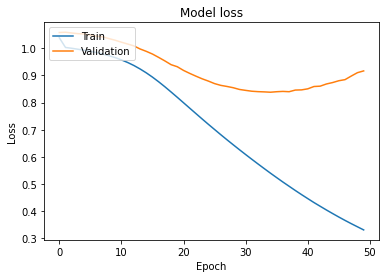

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

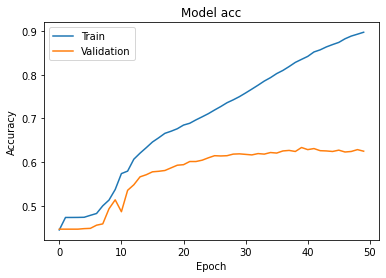

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [18]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.9051 - accuracy: 0.6414


In [19]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.05312405, 0.14426625, 0.8026096 ],
       [0.01022062, 0.0093495 , 0.9804299 ],
       [0.0613253 , 0.8638762 , 0.07479848],
       ...,
       [0.11035757, 0.6680324 , 0.22160998],
       [0.0621157 , 0.05702661, 0.8808577 ],
       [0.09101706, 0.58561796, 0.323365  ]], dtype=float32)

In [20]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [21]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

# Avaliação do Desempenho

## Matriz de Confusão

In [22]:
def confusion_matrix(y_pred, y_true):
    conf = np.zeros((3, 3))

    for pred, true in zip(y_pred, y_true):
            conf[pred][true]+=1
    return conf

In [23]:
conf = confusion_matrix(y_pred, y_test_int)
conf

array([[ 119.,   23.,   30.],
       [ 330., 1233.,  522.],
       [ 110.,  257.,  923.]])

## Medidas

Acurácia:

In [24]:
def accuracy(conf): return conf.trace() / np.sum(conf)

Precisão:

In [25]:
def precision(conf):
    return np.array([conf[i][i]/np.sum(conf[:,i]) for i in range(3)])

Revocação:

In [26]:
def recall(conf):
    return np.array([conf[i][i]/np.sum(conf[i]) for i in range(3)])

F1-Score:

In [27]:
def f1_score(conf):return  2/(1/recall(conf) + 1/precision(conf))

## Classification Report

In [28]:
def my_classification_report(y_pred, y_true):
    conf = confusion_matrix(y_pred, y_test_int)
    acc =  accuracy(conf).round(2)
    prec = precision(conf).round(2)
    rec =  recall(conf).round(2)
    f1 =  f1_score(conf).round(2)
    counts  = [int(sum(row)) for row in conf]
    print(f"{' '*18}Precisão Revocação F1-Score Suporte\n")
    for i, p, r, f, c in zip (range(3), prec, rec,f1, counts):
        print(f"{str(i).rjust(15)}{str(p).rjust(11)}{str(r).rjust(10)}{str(f).rjust(9)}{str(c).rjust(8)}")
    print("\nmédia ponderada",
          str(np.average(prec, weights=counts).round(2)).rjust(10),
          str(np.average(rec, weights=counts).round(2)).rjust(9),
          str(np.average(f1, weights=counts).round(2)).rjust(8),
          str(len(y_pred)).rjust(7))

In [29]:
my_classification_report(y_pred, y_test_int)

                  Precisão Revocação F1-Score Suporte

              0       0.21      0.69     0.33     172
              1       0.81      0.59     0.69    2085
              2       0.63      0.72     0.67    1290

média ponderada       0.72      0.64     0.67    3547
